[*********************100%%**********************]  1 of 1 completed
                           Open        High         Low       Close  \
Datetime                                                              
2024-01-02 09:30:00  250.080002  250.899994  244.410004  248.794006   
2024-01-02 10:00:00  248.779999  251.250000  248.050003  249.610001   
2024-01-02 10:30:00  249.600006  249.638199  246.820007  248.919998   
2024-01-02 11:00:00  248.899994  250.259995  248.339996  250.000000   
2024-01-02 11:30:00  249.994095  251.000000  249.900101  250.475403   
...                         ...         ...         ...         ...   
2024-01-26 13:30:00  183.490097  183.630005  182.291000  182.644394   
2024-01-26 14:00:00  182.654999  182.660004  182.100006  182.280106   
2024-01-26 14:30:00  182.300003  183.380005  182.119995  183.270004   
2024-01-26 15:00:00  183.270004  183.320007  182.380005  182.630005   
2024-01-26 15:30:00  182.629898  183.470001  182.610001  183.229904   

       

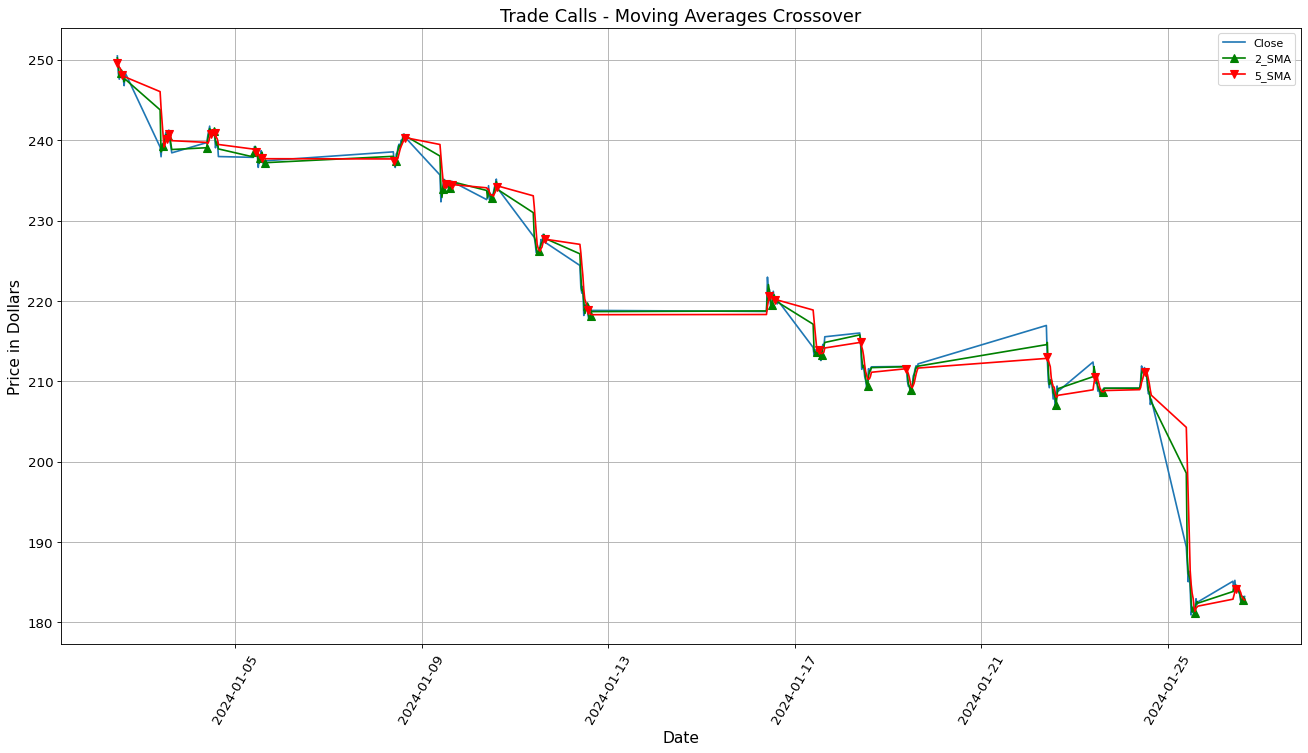

In [1]:
import pandas as pd
import requests 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from pyfile.scrapestockdata import data_tsla, Trade_Buy, Trade_Sell
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Define the endpoint
url = 'https://newsapi.org/v2/everything?'

# Specify the query and number of returns
parameters = {
    'q': 'TSLA', # query phrase
    'sortBy': 'popularity', # articles from popular sources and publishers come first
    'pageSize': 100,  # maximum is 100 for developer version
    'apiKey': 'b1c121c11d4540299f888a29b82a96a8', # your own API key
}
# Make the request
response = requests.get(url, params=parameters)

In [3]:
# Convert the response to JSON format and store it in dataframe
data = pd.DataFrame(response.json())
news_df = pd.concat([data['articles'].apply(pd.Series)], axis=1)
news_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'MarketWatch'}",Philip van Doorn,Elon Musk has egg on his face,"Even Wedbush analyst Daniel Ives, normally a r...",https://www.marketwatch.com/story/elon-musk-ha...,https://images.mktw.net/im-18501351/social,2024-01-26T16:03:00Z,Shares of Tesla Inc. were down 26.5% for 2024 ...
1,"{'id': None, 'name': 'MarketWatch'}",Claudia Assis,Tesla warns Wall Street it could sell fewer ve...,Tesla Inc. warned investors late Wednesday tha...,https://www.marketwatch.com/story/tesla-warns-...,https://images.mktw.net/im-475346/social,2024-01-24T21:16:00Z,Tesla Inc. warned investors late Wednesday tha...
2,"{'id': None, 'name': 'MarketWatch'}",Claudia Assis,Elon Musk’s $56 billion Tesla pay package in l...,A Delaware judge late Tuesday voided Tesla Inc...,https://www.marketwatch.com/story/elon-musks-5...,https://images.mktw.net/im-73363001/social,2024-01-30T22:40:00Z,A Delaware judge late Tuesday voided Tesla Inc...
3,"{'id': None, 'name': 'MarketWatch'}",Steve Goldstein,BYD shares slip as Tesla rival says profits su...,"BYD shares slumped 4% in Hong Kong on Tuesday,...",https://www.marketwatch.com/story/byd-shares-s...,https://images.mktw.net/im-14972718/social,2024-01-30T09:44:00Z,"BYD shares slumped 4% in Hong Kong on Tuesday,..."
4,"{'id': None, 'name': 'MarketWatch'}",Mike Murphy,Tesla settles California hazardous-waste lawsu...,Tesla Inc. will pay $1.5 million to settle a l...,https://www.marketwatch.com/story/tesla-settle...,https://images.mktw.net/im-36268349/social,2024-02-02T02:38:00Z,Tesla Inc. will pay $1.5 million to settle a l...
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'Forbes'}","Trefis Team, Contributor, \n Trefis Team, Cont...","Down 40% In The Last 12 Months, Is Alibaba Sto...",Retail sales in China over 2023 grew by 7.2% y...,https://www.forbes.com/sites/greatspeculations...,https://imageio.forbes.com/specials-images/ima...,2024-01-24T12:00:22Z,"SHANGHAI, CHINA - MARCH 23, 2021 - Alibaba's s..."
96,"{'id': None, 'name': 'Forbes'}","Trefis Team, Contributor, \n Trefis Team, Cont...","Flat Since The Beginning Of 2023, What’s Next ...",Guess stock has been volatile lately due to a ...,https://www.forbes.com/sites/greatspeculations...,https://imageio.forbes.com/specials-images/ima...,2024-01-17T13:00:00Z,"[Note: GuessGES\r\n FY23 ended on Jan 28, 2023..."
97,"{'id': None, 'name': 'Forbes'}","Trefis Team, Contributor, \n Trefis Team, Cont...","Up 130% In The Last 12 Months, Will AI Power A...",We project that earnings will come in at about...,https://www.forbes.com/sites/greatspeculations...,https://imageio.forbes.com/specials-images/ima...,2024-01-22T12:00:00Z,"DANA POINT, CALIFORNIA - SEPTEMBER 26: Dr. Lis..."
98,"{'id': None, 'name': 'Forbes'}","Trefis Team, Contributor, \n Trefis Team, Cont...","Down 5% Over The Last Month, Will Strong IPhon...",Apple is expected to publish its Q1 FY’24 resu...,https://www.forbes.com/sites/greatspeculations...,https://imageio.forbes.com/specials-images/ima...,2024-01-22T12:00:00Z,Customers are experiencing the newly launched ...


In [4]:
final_news = news_df.loc[:,['publishedAt','title']]
final_news['publishedAt'] = pd.to_datetime(final_news['publishedAt'])
final_news.sort_values(by='publishedAt',inplace=True)
final_news

,publishedAt,title
93,2024-01-12 13:00:00+00:00,"Rising 15% Over The Last Year, Will Comcast St..."
36,2024-01-16 10:04:00+00:00,Tesla’s redesigned Model 3 is now available in...
63,2024-01-16 11:00:00+00:00,"Down 9% Year-To Date, Will A Q4 Earnings Beat ..."
16,2024-01-16 11:45:00+00:00,Another Wall Street bank has boosted its S&P 5...
45,2024-01-16 19:55:00+00:00,Beware of ‘pricey’ U.S. stocks as inflation ma...
...,...,...
8,2024-02-09 12:09:00+00:00,Nvidia’s now worth as much as the entire Chine...
26,2024-02-09 12:30:00+00:00,Big is ‘anything but beautiful’ as stocks clim...
75,2024-02-09 14:00:00+00:00,"Up 290% Since The Start Of 2023, Where Is Meta..."
91,2024-02-11 12:00:00+00:00,Stocks Rise Despite Higher Bond Yields


In [5]:
# Import BDay to determine business day's dates
from pandas.tseries.offsets import BDay

# to get the business day for which particular news headline should be used to make trade calls
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=13,minute=30) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=20,minute=0) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=20,minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=13,minute=30)
    
    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
        return None

In [7]:
 # Apply the above function to get the trading time for each news headline
final_news["trading_time"] = final_news["publishedAt"].apply(get_trade_open)

final_news = final_news[pd.notnull(final_news['trading_time'])]
final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)
final_news

C:\Users\DELL\AppData\Local\Temp\ipykernel_6036\3040318134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)


,publishedAt,title,trading_time,Date
93,2024-01-12 13:00:00+00:00,"Rising 15% Over The Last Year, Will Comcast St...",2024-01-12 13:30:00+00:00,2024-01-12
36,2024-01-16 10:04:00+00:00,Tesla’s redesigned Model 3 is now available in...,2024-01-16 13:30:00+00:00,2024-01-16
63,2024-01-16 11:00:00+00:00,"Down 9% Year-To Date, Will A Q4 Earnings Beat ...",2024-01-16 13:30:00+00:00,2024-01-16
16,2024-01-16 11:45:00+00:00,Another Wall Street bank has boosted its S&P 5...,2024-01-16 13:30:00+00:00,2024-01-16
22,2024-01-17 10:02:00+00:00,Here are the 10 electric vehicles that sold th...,2024-01-17 13:30:00+00:00,2024-01-17
...,...,...,...,...
28,2024-02-09 11:35:00+00:00,The stock market right now resembles the Y2K s...,2024-02-09 13:30:00+00:00,2024-02-09
8,2024-02-09 12:09:00+00:00,Nvidia’s now worth as much as the entire Chine...,2024-02-09 13:30:00+00:00,2024-02-09
26,2024-02-09 12:30:00+00:00,Big is ‘anything but beautiful’ as stocks clim...,2024-02-09 13:30:00+00:00,2024-02-09
91,2024-02-11 12:00:00+00:00,Stocks Rise Despite Higher Bond Yields,2024-02-12 13:30:00+00:00,2024-02-12


In [9]:
# getting compound for each news headline
cs = []
for row in range(len(final_news)):
    cs.append(analyzer.polarity_scores(final_news['title'].iloc[row])['compound'])

final_news['compound_vader_score'] = cs
final_news

C:\Users\DELL\AppData\Local\Temp\ipykernel_6036\2086711333.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['compound_vader_score'] = cs


,publishedAt,title,trading_time,Date,compound_vader_score
93,2024-01-12 13:00:00+00:00,"Rising 15% Over The Last Year, Will Comcast St...",2024-01-12 13:30:00+00:00,2024-01-12,0.3400
36,2024-01-16 10:04:00+00:00,Tesla’s redesigned Model 3 is now available in...,2024-01-16 13:30:00+00:00,2024-01-16,0.0000
63,2024-01-16 11:00:00+00:00,"Down 9% Year-To Date, Will A Q4 Earnings Beat ...",2024-01-16 13:30:00+00:00,2024-01-16,0.0000
16,2024-01-16 11:45:00+00:00,Another Wall Street bank has boosted its S&P 5...,2024-01-16 13:30:00+00:00,2024-01-16,0.3612
22,2024-01-17 10:02:00+00:00,Here are the 10 electric vehicles that sold th...,2024-01-17 13:30:00+00:00,2024-01-17,0.0000
...,...,...,...,...,...
28,2024-02-09 11:35:00+00:00,The stock market right now resembles the Y2K s...,2024-02-09 13:30:00+00:00,2024-02-09,0.2732
8,2024-02-09 12:09:00+00:00,Nvidia’s now worth as much as the entire Chine...,2024-02-09 13:30:00+00:00,2024-02-09,0.2263
26,2024-02-09 12:30:00+00:00,Big is ‘anything but beautiful’ as stocks clim...,2024-02-09 13:30:00+00:00,2024-02-09,0.7469
91,2024-02-11 12:00:00+00:00,Stocks Rise Despite Higher Bond Yields,2024-02-12 13:30:00+00:00,2024-02-12,0.0000


In [10]:
final_news = final_news[(final_news[['compound_vader_score']] != 0).all(axis=1)].reset_index(drop=True)
final_news

,publishedAt,title,trading_time,Date,compound_vader_score
0,2024-01-12 13:00:00+00:00,"Rising 15% Over The Last Year, Will Comcast St...",2024-01-12 13:30:00+00:00,2024-01-12,0.3400
1,2024-01-16 11:45:00+00:00,Another Wall Street bank has boosted its S&P 5...,2024-01-16 13:30:00+00:00,2024-01-16,0.3612
2,2024-01-17 10:22:00+00:00,Tesla cuts prices in Germany after reductions ...,2024-01-17 13:30:00+00:00,2024-01-17,-0.2960
3,2024-01-18 12:00:00+00:00,"Up 21% In The Last Six Months, Will IBM Stock ...",2024-01-18 13:30:00+00:00,2024-01-18,0.3400
4,2024-01-18 13:00:00+00:00,"Gaining 50% Over The Last 12 Months, Will Inte...",2024-01-18 13:30:00+00:00,2024-01-18,0.4215
5,2024-01-19 11:00:00+00:00,Bloom Energy Stock Down 14% Year To Date. Why ...,2024-01-19 13:30:00+00:00,2024-01-19,0.2732
6,2024-01-19 13:00:00+00:00,Where Is News Corp Stock Headed After Growing ...,2024-01-19 13:30:00+00:00,2024-01-19,0.1779
7,2024-01-21 16:39:56+00:00,March Rate Cut Odds Plummet As Magnificent 7 S...,2024-01-22 13:30:00+00:00,2024-01-22,0.4215
8,2024-01-22 11:46:00+00:00,The stock market needs better earnings to keep...,2024-01-22 13:30:00+00:00,2024-01-22,0.3612
9,2024-01-22 12:00:00+00:00,"Down 5% Over The Last Month, Will Strong IPhon...",2024-01-22 13:30:00+00:00,2024-01-22,0.7184


In [11]:
# Retaining extreme (max and min) compound scores for same Day news headlines
unique_dates = final_news['Date'].unique()
grouped_dates = final_news.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_cs = []
min_cs = []

for key in grouped_dates.groups.keys():
    data = grouped_dates.get_group(key)
    if data["compound_vader_score"].max() > 0:
        max_cs.append(data["compound_vader_score"].max())
    elif data["compound_vader_score"].max() < 0:
        max_cs.append(0)
    
    if data["compound_vader_score"].min() < 0:
        min_cs.append(data["compound_vader_score"].min())
    elif data["compound_vader_score"].min() > 0:
        min_cs.append(0)

In [12]:
extreme_scores_dict = {'Date':keys_dates,'max_scores':max_cs,'min_scores':min_cs}
extreme_scores_df = pd.DataFrame(extreme_scores_dict)

#summing and calculating Vader score
final_scores = []
for i in range(len(extreme_scores_df)):
    final_scores.append(extreme_scores_df['max_scores'].values[i] + extreme_scores_df['min_scores'].values[i])

extreme_scores_df['final_scores'] = final_scores
extreme_scores_df

,Date,max_scores,min_scores,final_scores
0,2024-01-12,0.3400,0.0000,0.3400
1,2024-01-16,0.3612,0.0000,0.3612
2,2024-01-17,0.0000,-0.2960,-0.2960
3,2024-01-18,0.4215,0.0000,0.4215
4,2024-01-19,0.2732,0.0000,0.2732
5,2024-01-22,0.7184,0.0000,0.7184
6,2024-01-23,0.0772,0.0000,0.0772
7,2024-01-24,0.2960,-0.2960,0.0000
8,2024-01-25,0.0000,-0.1027,-0.1027
9,2024-01-26,0.3089,-0.7579,-0.4490


In [13]:
#Using final compound VADER scores with threshold to generate trade calls
# VADER trade calls - with threshold
vader_Buy=[]
vader_Sell=[]
for i in range(len(extreme_scores_df)):
    if extreme_scores_df['final_scores'].values[i] > 0.20:
        print("Trade Call for {row} is Buy.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Buy.append(extreme_scores_df['Date'].iloc[i].date())
    elif extreme_scores_df['final_scores'].values[i] < -0.20:
        print("Trade Call for {row} is Sell.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Sell.append(extreme_scores_df['Date'].iloc[i].date())

vader_buy = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in vader_Buy:
        vader_buy.append(i)
        
vader_sell = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in vader_Sell:
        vader_sell.append(i)

print(vader_buy)
print(vader_sell)

Trade Call for 2024-01-12 is Buy.
Trade Call for 2024-01-16 is Buy.
Trade Call for 2024-01-17 is Sell.
Trade Call for 2024-01-18 is Buy.
Trade Call for 2024-01-19 is Buy.
Trade Call for 2024-01-22 is Buy.
Trade Call for 2024-01-26 is Sell.
Trade Call for 2024-01-29 is Buy.
Trade Call for 2024-01-31 is Sell.
Trade Call for 2024-02-01 is Buy.
Trade Call for 2024-02-05 is Buy.
Trade Call for 2024-02-06 is Buy.
Trade Call for 2024-02-07 is Buy.
Trade Call for 2024-02-09 is Buy.
Trade Call for 2024-02-12 is Buy.
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]
[126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229]


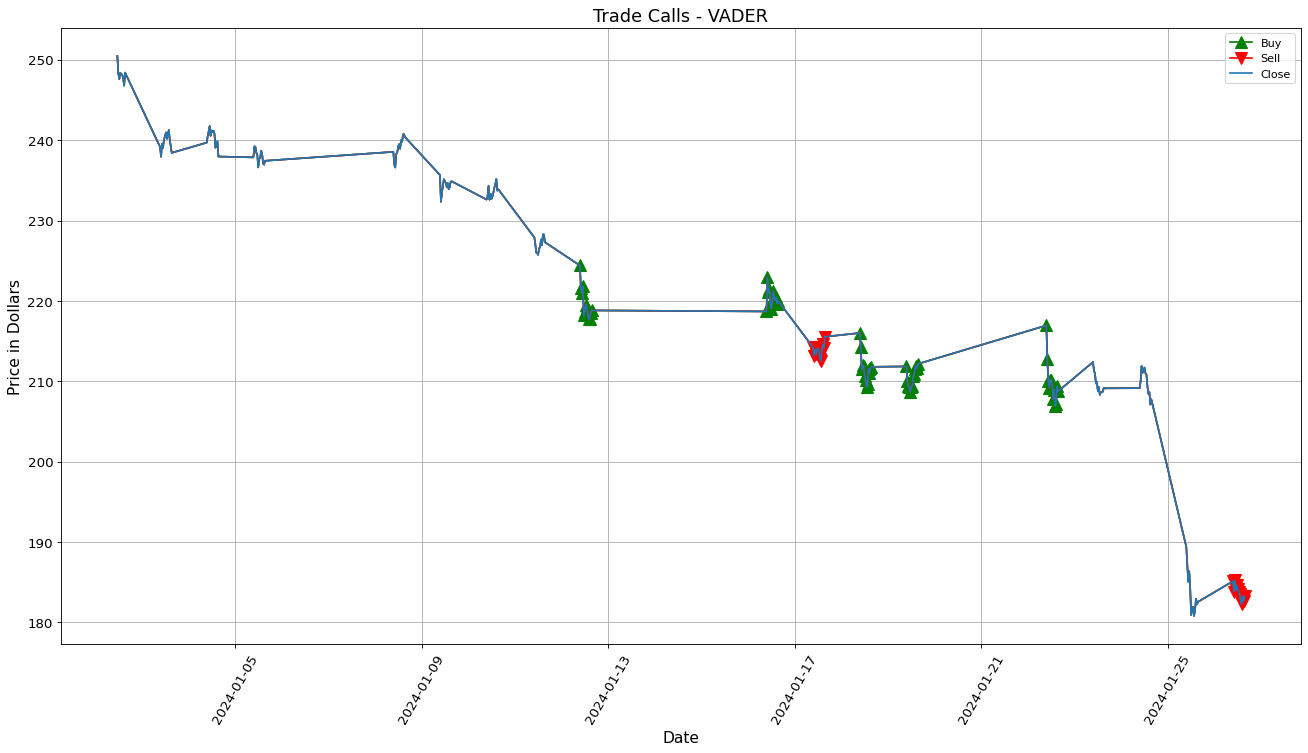

In [14]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=vader_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=vader_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - VADER', fontsize = 16)
plt.legend(['Buy','Sell','Close'])
plt.grid()
plt.show() 

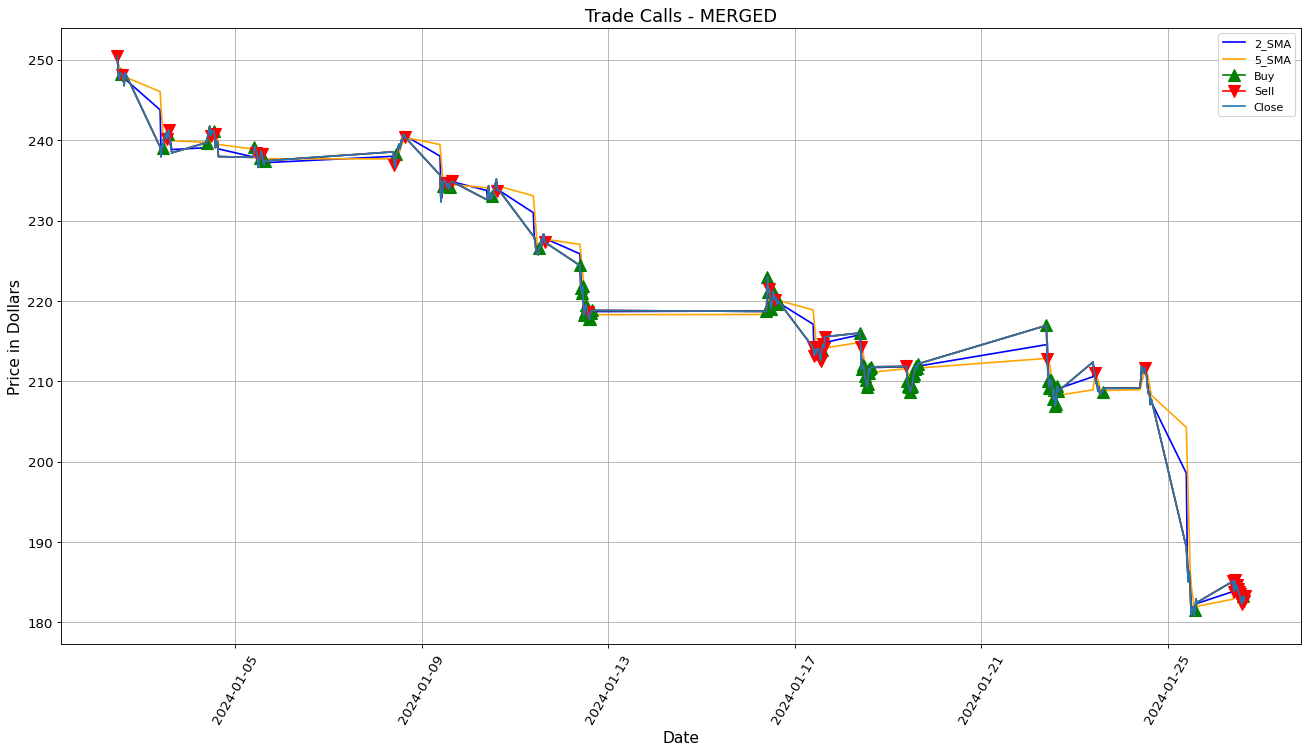

In [15]:
#prioritising SMA signals
final_buy = list(set(Trade_Buy + vader_buy) - set(Trade_Sell)) 
final_sell = list(set(Trade_Sell + vader_sell) - set(Trade_Buy))

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['2_SMA'], color='blue')
plt.plot(data_tsla.index, data_tsla['5_SMA'], color='orange')
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=final_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=final_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['2_SMA','5_SMA','Buy','Sell','Close'])
plt.grid()
plt.show() 

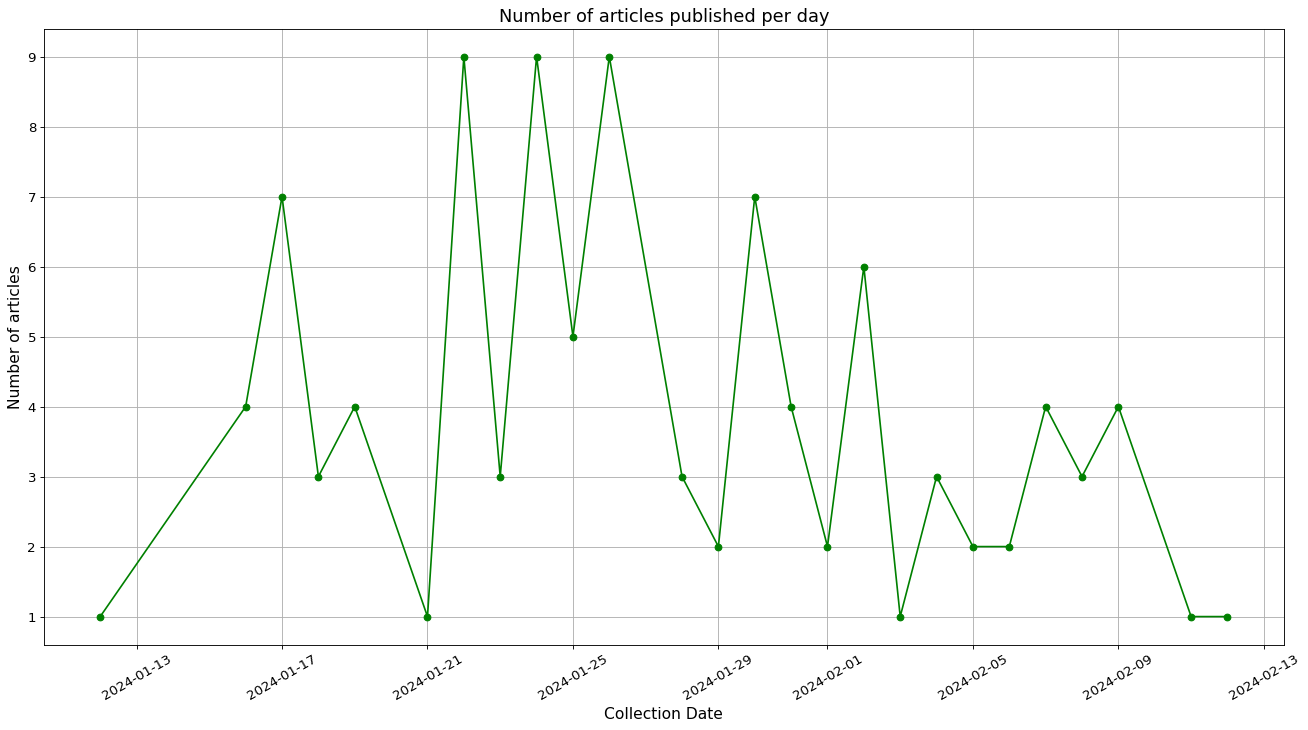

In [16]:
import matplotlib.pyplot as plt

# Đảm bảo rằng cột 'date' là kiểu dữ liệu datetime
news_df['publishedAt'] = pd.to_datetime(news_df['publishedAt'])
news_df['date'] = news_df['publishedAt'].dt.date

# Tính toán số lượng content mỗi ngày
content_count = news_df.groupby('date').size()

# Vẽ biểu đồ
plt.figure(figsize=(20,10), dpi=80)
content_count.plot(kind='line', marker='o', color='green')
plt.title('Number of articles published per day', fontsize = 16)
plt.xlabel('Collection Date', fontsize=14)
plt.ylabel('Number of articles',fontsize = 14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()